<a href="https://colab.research.google.com/github/ImPrateekParashar/Cureya/blob/main/Fraud_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install minisom

In [57]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

data= pd.read_csv("/content/drive/MyDrive/Cureya/Credit_Card_Applications.csv")

In [32]:
#data.info()
display(data.describe())
display(data.info())

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


None

In [33]:
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [34]:
print(data.columns.values)

['CustomerID' 'A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'A10' 'A11'
 'A12' 'A13' 'A14' 'Class']


In [35]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1]

In [36]:
X

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, ..., 2.0000000e+00,
        1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, ..., 2.0000000e+00,
        2.8000000e+02, 1.0000000e+00],
       ...,
       [1.5675450e+07, 0.0000000e+00, 1.8830000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.0000000e+00],
       [1.5776494e+07, 0.0000000e+00, 2.7420000e+01, ..., 2.0000000e+00,
        1.2000000e+02, 1.2000000e+01],
       [1.5592412e+07, 1.0000000e+00, 4.1000000e+01, ..., 1.0000000e+00,
        5.6000000e+02, 1.0000000e+00]])

In [37]:
y

0      0
1      0
2      0
3      1
4      1
      ..
685    1
686    0
687    1
688    1
689    1
Name: Class, Length: 690, dtype: int64

In [38]:
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [41]:
#Training the Self Organizing Maps
som = MiniSom(x=10,y=10,input_len=15, sigma=1.0,learning_rate=0.3,random_seed = 101)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

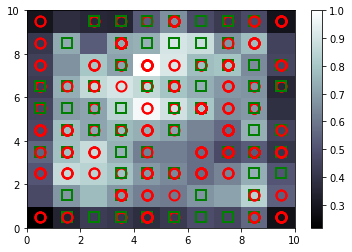

In [59]:
#Visualize the Self Organizing Maps
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']
for index,columns in enumerate(X):
  w=som.winner(columns)
  plot(w[0]+0.5,
       w[1]+0.5,
       markers[y[index]],
       markeredgecolor=colors[y[index]],
       markerfacecolor='None',
       markersize=10,
       markeredgewidth=2)

The red color indicates the customer whose application were not approved and green color were the approved customers.

The potential fraudsters are in the co-ordinates (4,7) and (8,1).

Print the customer ids with the probability of their being a fraudster.


In [46]:
mapp = som.win_map(X)
print("\nMappings are:\n", mapp)
frauds = np.concatenate((mapp[(1,2)],mapp[(6,8)]),axis=0)
frauds = sc.inverse_transform(frauds)
print("\nFrauds customers are:\n\n",frauds)


Mappings are:
 defaultdict(<class 'list'>, {(7, 4): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
       0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.57477506, 1.        , 0.14030075, 0.08928571, 0.5       ,
       0.        , 0.        , 0.00298246, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.05      , 0.04208   ]), array([5.45275078e-01, 1.00000000e+00, 5.26315789e-02, 1.07142857e-01,
       5.00000000e-01, 2.30769231e-01, 3.75000000e-01, 1.40350877e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       5.00000000e-01, 8.00000000e-02, 4.00000000e-04]), array([0.75215934, 1.        , 0.32827068, 0.02678571, 0.5       ,
       0.23076923, 0.375     , 0.05263158, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.1155    , 0.        ]), array([0.72114172, 1.        , 0.15533835, 0.32142857, 0.5       ,


In [48]:
df_frauds = pd.DataFrame(frauds)
df_frauds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15716082.0,0.0,22.25,1.250,1.0,1.0,1.0,3.250,0.0,0.0,0.0,0.0,2.0,280.0,1.0
1,15752344.0,0.0,21.08,5.000,1.0,1.0,1.0,0.000,0.0,0.0,0.0,0.0,2.0,0.0,1.0
2,15611409.0,0.0,23.58,0.585,1.0,1.0,1.0,0.125,0.0,0.0,0.0,0.0,2.0,120.0,88.0
3,15636454.0,0.0,52.17,0.000,1.0,1.0,1.0,0.000,0.0,0.0,0.0,0.0,2.0,0.0,1.0
4,15789611.0,0.0,47.75,8.000,2.0,8.0,4.0,7.875,1.0,1.0,6.0,1.0,2.0,0.0,1261.0
5,15738487.0,0.0,20.75,10.250,2.0,11.0,4.0,0.710,1.0,1.0,2.0,1.0,2.0,49.0,1.0
6,15773421.0,0.0,20.75,10.335,2.0,13.0,8.0,0.335,1.0,1.0,1.0,1.0,2.0,80.0,51.0
7,15781875.0,0.0,24.75,12.500,2.0,6.0,4.0,1.500,1.0,1.0,12.0,1.0,2.0,120.0,568.0
8,15809837.0,0.0,46.08,3.000,2.0,8.0,4.0,2.375,1.0,1.0,8.0,1.0,2.0,396.0,4160.0
9,15761554.0,0.0,30.50,6.500,2.0,8.0,5.0,4.000,1.0,1.0,7.0,1.0,2.0,0.0,3066.0


In [51]:
customers = data.iloc[:,1:].values
is_fraud = np.zeros(len(data))

for i in range(len(data)):
    if data.iloc[i, 0] in frauds:
        is_fraud[i] = 1

In [52]:
print(is_fraud)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [55]:
from keras.models import Sequential 
from keras.layers import Dense 

classifier = Sequential()
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 10)

y_pred = classifier.predict(customers)
y_pred = np.concatenate((data.iloc[:,0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:,1].argsort()]

Epoch 1/10
690/690 [==============================] - 1s 986us/step - loss: 0.5589 - accuracy: 0.9739
Epoch 2/10
690/690 [==============================] - 1s 1ms/step - loss: 0.3697 - accuracy: 0.9812
Epoch 3/10
690/690 [==============================] - 1s 1ms/step - loss: 0.2619 - accuracy: 0.9812
Epoch 4/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1992 - accuracy: 0.9812
Epoch 5/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1614 - accuracy: 0.9812
Epoch 6/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1380 - accuracy: 0.9812
Epoch 7/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1234 - accuracy: 0.9812
Epoch 8/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1140 - accuracy: 0.9812
Epoch 9/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1079 - accuracy: 0.9812
Epoch 10/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1038 - accuracy: 0.98

In [56]:
data1 = pd.DataFrame(y_pred, columns=['Customers','Fraud_probability'])
data1

,Customers,Fraud_probability
0,15776156.0,0.042458
1,15627365.0,0.042458
2,15748499.0,0.042458
3,15598614.0,0.042458
4,15668889.0,0.042458
...,...,...
685,15607986.0,0.042458
686,15799785.0,0.042458
687,15699963.0,0.042458
688,15793366.0,0.042458
